In [1]:
# Load the data like before
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

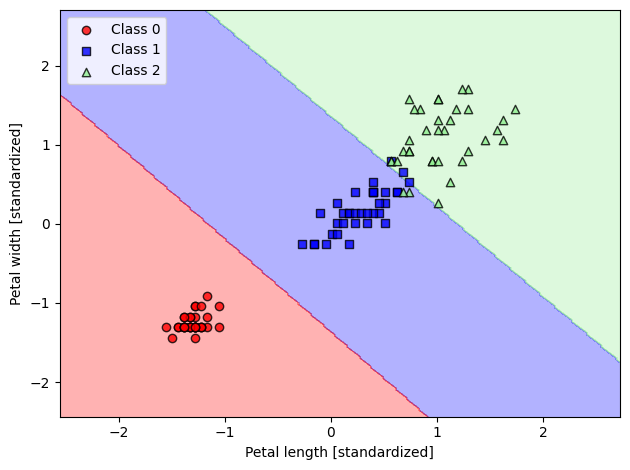

In [3]:
from utils.plot import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X=X_train_std, y=y_train, classifier=svm)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Alternative implementations: If we want to use SGD with the discussed model

In [4]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## Kernel SVM

In [5]:
# First create nonlinear dataset
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

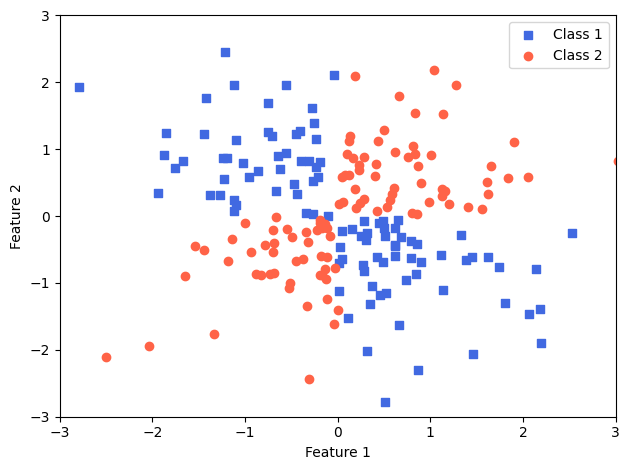

In [6]:
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

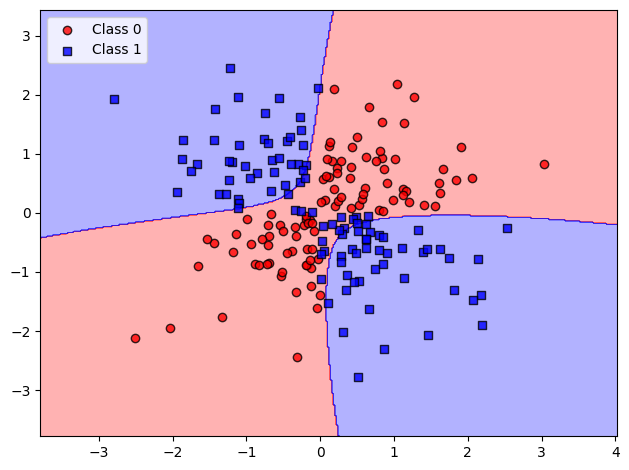

In [7]:
# Using non-linear kernel
svm = SVC(kernel='rbf', C=10.0, gamma=0.10, random_state=1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

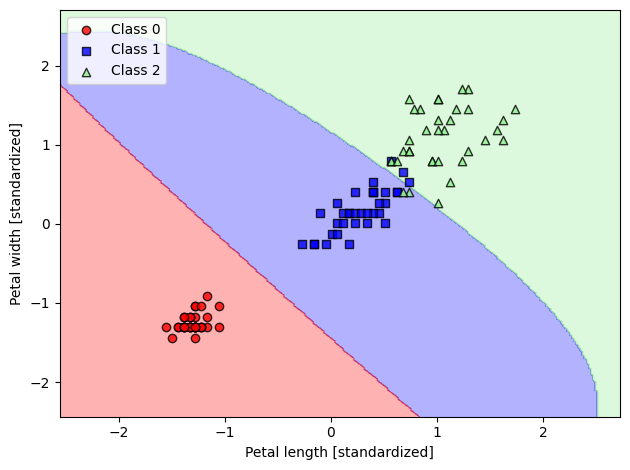

In [8]:
# Low gamma: relatively soft decisionb boundary
svm = SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_train_std, y=y_train, classifier=svm)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

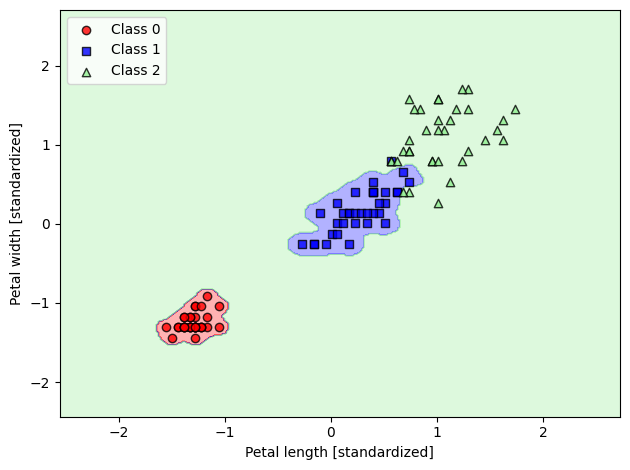

In [9]:
# High gamma: Much tighter decision boundary (but high generalization error: gamma is used to control overfitting/variance)
svm = SVC(kernel='rbf', C=1.0, gamma=100.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_train_std, y=y_train, classifier=svm)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()